In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    "../coal-price-data/palmer_penguins_for_binary_classification/penguins_binary_classification.csv",
    header=0,
)
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
269  Gentoo     Biscoe            47.2           13.7              214.0   
270  Gentoo     Biscoe            46.8           14.3              215.0   
271  Gentoo     Biscoe            50.4           15.7              222.0   
272  Gentoo     Biscoe            45.2           14.8              212.0   
273  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  year  
0         3750.0  2007  
1         3800.0  2007  
2         3250.0  2007  
3         3450.0  2007  
4         3650.0  2007  
..           ...   ...  
269       4925.0  2009  
270       4850.0  2009  
271       5750.0  2009  
272       5200.0  2009  
273       5400.0  2009  

[274 rows x 7 columns]

In [3]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
numeric_df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0              39.1           18.7              181.0       3750.0  2007
1              39.5           17.4              186.0       3800.0  2007
2              40.3           18.0              195.0       3250.0  2007
3              36.7           19.3              193.0       3450.0  2007
4              39.3           20.6              190.0       3650.0  2007
..              ...            ...                ...          ...   ...
269            47.2           13.7              214.0       4925.0  2009
270            46.8           14.3              215.0       4850.0  2009
271            50.4           15.7              222.0       5750.0  2009
272            45.2           14.8              212.0       5200.0  2009
273            49.9           16.1              213.0       5400.0  2009

[274 rows x 5 columns]

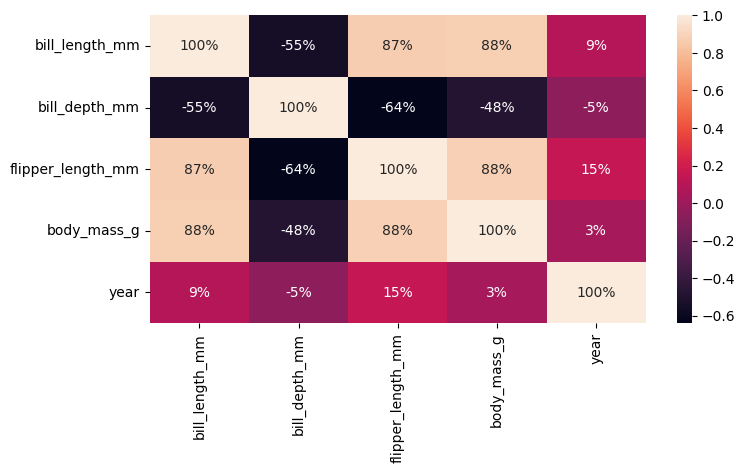

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(8, 4))

import seaborn as sns

sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()

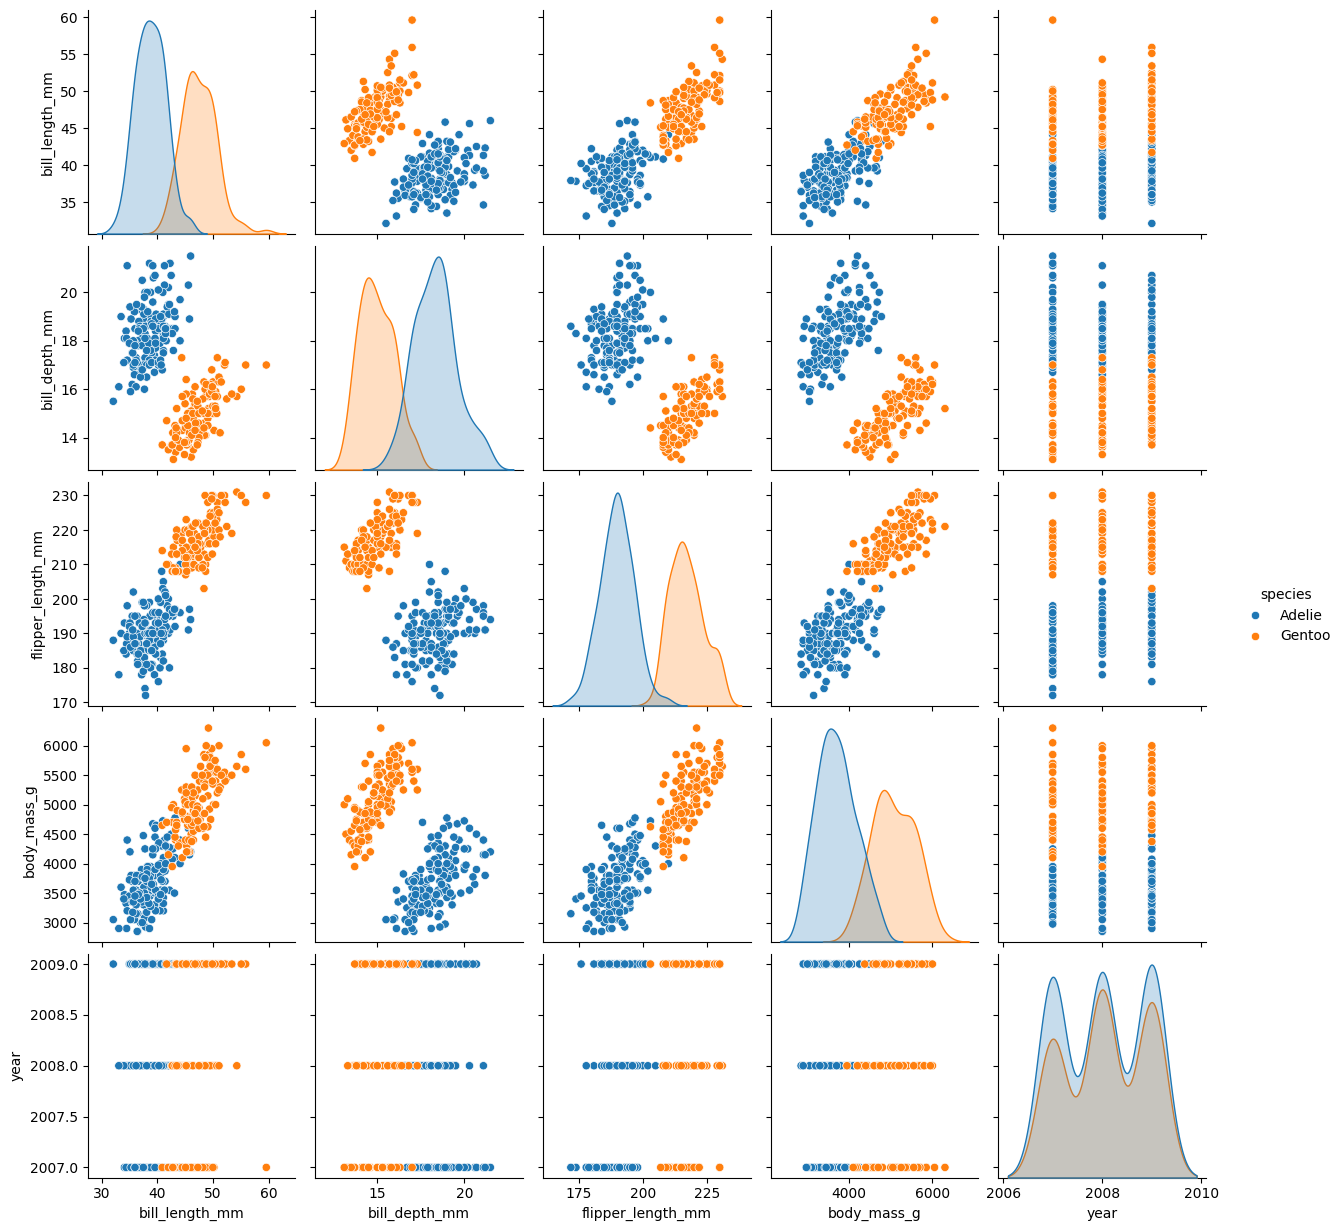

In [5]:
# let Create a pair plot of some columns
df_temp = df.drop(columns=["bill_length_mm", "body_mass_g"])
sns.pairplot(
    df.iloc[:, :], hue="species"
)  # graph also  tell us about the the realationship between the two columns

In [6]:
# One-hot encode the categorical data and sort by flipper_length_mm
df_dummy = pd.get_dummies(df, dtype=int).sort_values(
    by="flipper_length_mm", ascending=True
)

In [7]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
269  Gentoo     Biscoe            47.2           13.7              214.0   
270  Gentoo     Biscoe            46.8           14.3              215.0   
271  Gentoo     Biscoe            50.4           15.7              222.0   
272  Gentoo     Biscoe            45.2           14.8              212.0   
273  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  year  
0         3750.0  2007  
1         3800.0  2007  
2         3250.0  2007  
3         3450.0  2007  
4         3650.0  2007  
..           ...   ...  
269       4925.0  2009  
270       4850.0  2009  
271       5750.0  2009  
272       5200.0  2009  
273       5400.0  2009  

[274 rows x 7 columns]

In [8]:
df_dummy

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
27             37.9           18.6              172.0       3150.0  2007   
19             37.8           18.3              174.0       3400.0  2007   
121            40.2           17.0              176.0       3450.0  2009   
30             37.2           18.1              178.0       3900.0  2007   
29             39.5           16.7              178.0       3250.0  2007   
..              ...            ...                ...          ...   ...   
216            49.8           16.8              230.0       5700.0  2008   
184            59.6           17.0              230.0       6050.0  2007   
226            48.6           16.0              230.0       5800.0  2008   
264            51.5           16.3              230.0       5500.0  2009   
214            54.3           15.7              231.0       5650.0  2008   

     species_Adelie  species_Gentoo  island_Biscoe  island_Dream  \
27                1               0              1             0   
19                1               0              1             0   
121               1               0              0             0   
30                1               0              0             1   
29                1               0              0             1   
..              ...             ...            ...           ...   
216               0               1              1             0   
184               0               1              1             0   
226               0               1              1             0   
264               0               1              1             0   
214               0               1              1             0   

     island_Torgersen  
27                  0  
19                  0  
121                 1  
30                  0  
29                  0  
..                ...  
216                 0  
184                 0  
226                 0  
264                 0  
214                 0  

[274 rows x 10 columns]

In [9]:
# Select the features and the target variable
X = df_dummy[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
# X = df_dummy[["flipper_length_mm"]]
Y = df_dummy["species_Gentoo"]

In [10]:
X

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
27             37.9           18.6              172.0       3150.0
19             37.8           18.3              174.0       3400.0
121            40.2           17.0              176.0       3450.0
30             37.2           18.1              178.0       3900.0
29             39.5           16.7              178.0       3250.0
..              ...            ...                ...          ...
216            49.8           16.8              230.0       5700.0
184            59.6           17.0              230.0       6050.0
226            48.6           16.0              230.0       5800.0
264            51.5           16.3              230.0       5500.0
214            54.3           15.7              231.0       5650.0

[274 rows x 4 columns]

In [11]:
Y

27     0
19     0
121    0
30     0
29     0
      ..
216    1
184    1
226    1
264    1
214    1
Name: species_Gentoo, Length: 274, dtype: int64

In [12]:
# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=41
)

In [13]:
# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [53]:
log.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0])

In [45]:
type(df_dummy)

pandas.core.frame.DataFrame

In [38]:
df_dummy.iloc[27]

bill_length_mm         36.6
bill_depth_mm          18.4
flipper_length_mm     184.0
body_mass_g          3475.0
year                 2009.0
species_Adelie          1.0
species_Gentoo          0.0
island_Biscoe           0.0
island_Dream            1.0
island_Torgersen        0.0
Name: 146, dtype: float64

In [46]:
type(df_dummy.iloc[27])

pandas.core.series.Series

In [43]:
df_dummy[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].iloc[27]

bill_length_mm         36.6
bill_depth_mm          18.4
flipper_length_mm     184.0
body_mass_g          3475.0
Name: 146, dtype: float64

In [44]:
df_dummy[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].loc[27]

bill_length_mm         37.9
bill_depth_mm          18.6
flipper_length_mm     172.0
body_mass_g          3150.0
Name: 27, dtype: float64

In [83]:
index = 250

In [84]:
df_dummy.filter(items=[index], axis=0)

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
250            51.1           16.5              225.0       5250.0  2009   

     species_Adelie  species_Gentoo  island_Biscoe  island_Dream  \
250               0               1              1             0   

     island_Torgersen  
250                 0

In [85]:
df_dummy.filter(items=[index], axis=0)[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
250            51.1           16.5              225.0       5250.0

In [86]:
df_dummy.filter(items=[index], axis=0)["species_Gentoo"]

250    1
Name: species_Gentoo, dtype: int64

In [87]:
log.predict(df_dummy.filter(items=[index], axis=0)[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

array([1])

In [15]:
log.coef_[0]

array([ 0.55517882, -0.62488127,  0.51826964,  0.00488339])

In [16]:
log.intercept_[0]

-142.10422565020278

In [17]:
# Define the sigmoid function
def sigmoid(x0, x1, x2, x3, log_coeffisiens, log_intercept):
    return 1 / (
        1
        + np.exp(
            -log_coeffisiens[0] * x0
            - log_coeffisiens[1] * x1
            - log_coeffisiens[2] * x2
            - log_coeffisiens[3] * x3
            - log_intercept
        )
    )


# Apply the sigmoid function using the coefficients
# The .ravel() is used to convert the 2D array of coefficients to a 1D array for compatibility.
log_coeffisiens = log.coef_[0]
log_intercept = log.intercept_[0]

In [18]:
X_train

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
229            45.2           13.8              215.0       4750.0
178            47.8           15.0              215.0       5650.0
80             42.9           17.6              196.0       4700.0
43             37.0           16.9              185.0       3000.0
206            45.0           15.4              220.0       5050.0
..              ...            ...                ...          ...
112            42.2           19.5              197.0       4275.0
202            48.5           14.1              220.0       5300.0
125            38.8           17.6              191.0       3275.0
223            48.2           15.6              221.0       5100.0
73             35.5           17.5              190.0       3700.0

[137 rows x 4 columns]

In [19]:
X_train["bill_length_mm"]

229    45.2
178    47.8
80     42.9
43     37.0
206    45.0
       ... 
112    42.2
202    48.5
125    38.8
223    48.2
73     35.5
Name: bill_length_mm, Length: 137, dtype: float64

In [20]:
# Create a range of values for X to plot the sigmoid function smoothly
x0_range = np.linspace(
    X_train["bill_length_mm"].min(), X_train["bill_length_mm"].max(), 300
).reshape(-1, 1)
x1_range = np.linspace(
    X_train["bill_depth_mm"].min(), X_train["bill_depth_mm"].max(), 300
).reshape(-1, 1)
x2_range = np.linspace(
    X_train["flipper_length_mm"].min(), X_train["flipper_length_mm"].max(), 300
).reshape(-1, 1)
x3_range = np.linspace(
    X_train["body_mass_g"].min(), X_train["body_mass_g"].max(), 300
).reshape(-1, 1)

In [21]:
x0_range

array([[33.1       ],
       [33.1735786 ],
       [33.24715719],
       [33.32073579],
       [33.39431438],
       [33.46789298],
       [33.54147157],
       [33.61505017],
       [33.68862876],
       [33.76220736],
       [33.83578595],
       [33.90936455],
       [33.98294314],
       [34.05652174],
       [34.13010033],
       [34.20367893],
       [34.27725753],
       [34.35083612],
       [34.42441472],
       [34.49799331],
       [34.57157191],
       [34.6451505 ],
       [34.7187291 ],
       [34.79230769],
       [34.86588629],
       [34.93946488],
       [35.01304348],
       [35.08662207],
       [35.16020067],
       [35.23377926],
       [35.30735786],
       [35.38093645],
       [35.45451505],
       [35.52809365],
       [35.60167224],
       [35.67525084],
       [35.74882943],
       [35.82240803],
       [35.89598662],
       [35.96956522],
       [36.04314381],
       [36.11672241],
       [36.190301  ],
       [36.2638796 ],
       [36.33745819],
       [36

In [22]:
Y_predicted = sigmoid(
    x0_range, x1_range, x2_range, x3_range, log_coeffisiens, log_intercept
)

In [23]:
Y_predicted

array([[2.94434841e-13],
       [3.50774347e-13],
       [4.17894303e-13],
       [4.97857526e-13],
       [5.93121548e-13],
       [7.06614147e-13],
       [8.41823323e-13],
       [1.00290450e-12],
       [1.19480823e-12],
       [1.42343235e-12],
       [1.69580323e-12],
       [2.02029171e-12],
       [2.40687041e-12],
       [2.86742016e-12],
       [3.41609516e-12],
       [4.06975800e-12],
       [4.84849790e-12],
       [5.77624808e-12],
       [6.88152138e-12],
       [8.19828646e-12],
       [9.76701185e-12],
       [1.16359097e-11],
       [1.38624172e-11],
       [1.65149625e-11],
       [1.96750669e-11],
       [2.34398508e-11],
       [2.79250185e-11],
       [3.32684138e-11],
       [3.96342570e-11],
       [4.72181912e-11],
       [5.62532959e-11],
       [6.70172493e-11],
       [7.98408633e-11],
       [9.51182497e-11],
       [1.13318933e-10],
       [1.35002279e-10],
       [1.60834690e-10],
       [1.91610080e-10],
       [2.28274279e-10],
       [2.71954096e-10],


In [24]:
X_gentoo = df_dummy[df_dummy["species_Gentoo"] == 1]["flipper_length_mm"].values
X_adelie = df_dummy[df_dummy["species_Gentoo"] == 0]["flipper_length_mm"].values

In [25]:
X_gentoo

array([203., 207., 208., 208., 208., 208., 208., 208., 208., 209., 209.,
       209., 209., 209., 210., 210., 210., 210., 210., 210., 210., 210.,
       210., 210., 211., 211., 212., 212., 212., 212., 212., 212., 213.,
       213., 213., 213., 213., 213., 214., 214., 214., 214., 214., 214.,
       215., 215., 215., 215., 215., 215., 215., 215., 215., 215., 215.,
       215., 216., 216., 216., 216., 216., 216., 216., 216., 217., 217.,
       217., 217., 217., 217., 218., 218., 218., 218., 218., 219., 219.,
       219., 219., 219., 220., 220., 220., 220., 220., 220., 220., 220.,
       221., 221., 221., 221., 221., 222., 222., 222., 222., 222., 222.,
       223., 223., 224., 224., 224., 225., 225., 225., 225., 226., 228.,
       228., 228., 228., 229., 229., 230., 230., 230., 230., 230., 230.,
       230., 231.])

In [26]:
# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("Accuracy: ", accuracy)

print("A: ", log.coef_, "B: ", log.intercept_)

Accuracy:  1.0
A:  [[ 0.55517882 -0.62488127  0.51826964  0.00488339]] B:  [-142.10422565]


In [27]:
Y_predicted

array([[2.94434841e-13],
       [3.50774347e-13],
       [4.17894303e-13],
       [4.97857526e-13],
       [5.93121548e-13],
       [7.06614147e-13],
       [8.41823323e-13],
       [1.00290450e-12],
       [1.19480823e-12],
       [1.42343235e-12],
       [1.69580323e-12],
       [2.02029171e-12],
       [2.40687041e-12],
       [2.86742016e-12],
       [3.41609516e-12],
       [4.06975800e-12],
       [4.84849790e-12],
       [5.77624808e-12],
       [6.88152138e-12],
       [8.19828646e-12],
       [9.76701185e-12],
       [1.16359097e-11],
       [1.38624172e-11],
       [1.65149625e-11],
       [1.96750669e-11],
       [2.34398508e-11],
       [2.79250185e-11],
       [3.32684138e-11],
       [3.96342570e-11],
       [4.72181912e-11],
       [5.62532959e-11],
       [6.70172493e-11],
       [7.98408633e-11],
       [9.51182497e-11],
       [1.13318933e-10],
       [1.35002279e-10],
       [1.60834690e-10],
       [1.91610080e-10],
       [2.28274279e-10],
       [2.71954096e-10],


Text(0, 0.5, 'Specie')

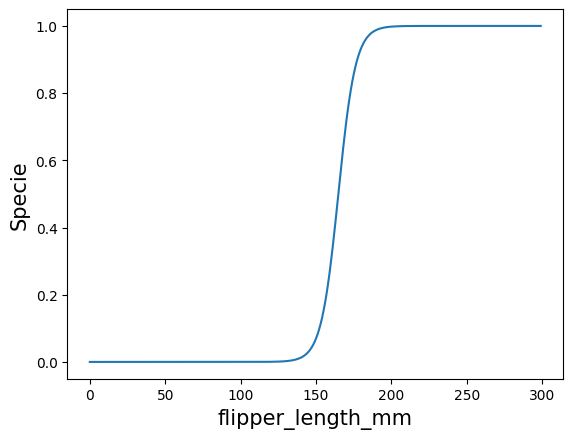

In [28]:
# Plot the predicted probabilities
# plt.plot(x2_range, Y_predicted, label="Predicted")
plt.plot(Y_predicted, label="Predicted")

# Plot the actual values colored by class
# plt.scatter(X_gentoo, Y[Y == 1], label="Gentoo", color="orange", alpha=0.5)
# plt.scatter(X_adelie, Y[Y == 0], label="Adelie", color="purple", alpha=0.5)
plt.xlabel("flipper_length_mm", fontsize=15)
plt.ylabel("Specie", fontsize=15)

# # Show the plot with legends
# plt.legend()
# plt.show()